In [ ]:
# Import necessary libraries
import pandas as pd  # For handling data in DataFrame format

#Natural language processing libraries
import nltk  # For natural language processing tasks(i.e A library for working with human language data)
from nltk.corpus import stopwords  # To access stopwords for text preprocessing
from nltk.stem import WordNetLemmatizer # To reduce words to their base or root form

# Download the list of stopwords from NLTK
nltk.download('stopwords') # Download stopwords data
nltk.download('wordnet')

/var/folders/dm/n6mxv2gx5k16st989zj1sk5m0000gn/T/ipykernel_62846/1118921107.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # For handling data in DataFrame format
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sudharshant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sudharshant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load datasets
train_data = pd.read_csv('train.csv')  # Read the CSV file into a DataFrame
train_data = train_data[['text', 'target']] #select column

test_data = pd.read_csv('test.csv')
# View the first 4 rows of the dataset to understand its structure
train_data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Check the overall structure and info about the dataset
train_data.info()  # To get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [ ]:
# Check for missing values
train_data.isnull().sum()

text      0
target    0
dtype: int64

In [ ]:
#Check for duplicate record
train_data.duplicated().sum()

92

In [ ]:
# Remove duplicate entries to avoid training the model on repetitive data
train_data.drop_duplicates(keep='first', inplace=True) # keep = 'first' means keeping the first occurence before removing duplicates

In [ ]:
# Confirm if there are still duplicates
train_data.duplicated().sum()

0

In [ ]:
# Check the updated shape of the dataset after removing duplicates
train_data.shape

(7521, 2)

In [ ]:
train_data.describe()  # Get summary statistics for numerical columns

,target
count,7521.000000
mean,0.426273
std,0.494567
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Check unique values in the 'target' column
print(train_data['target'].unique())

[1 0]


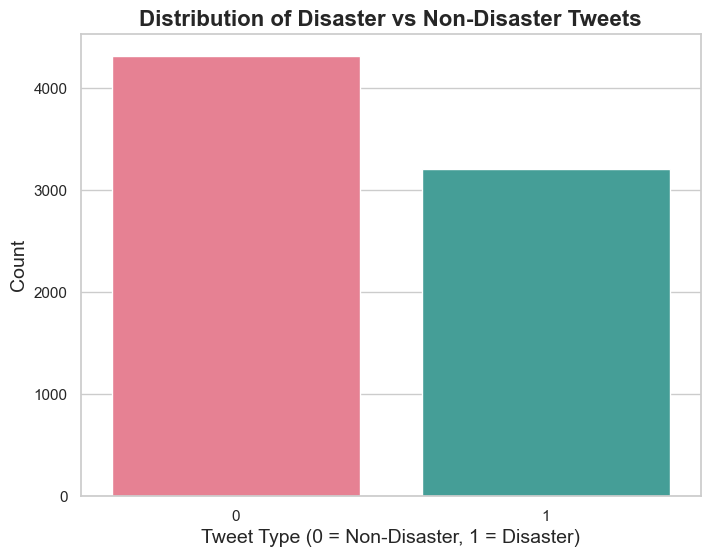

In [ ]:
# Import the required library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style='whitegrid')

# Plot label distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=train_data, palette='husl', hue='target', legend=False)

# Customize the title and labels
plt.title('Distribution of Disaster vs Non-Disaster Tweets', fontsize=16, fontweight='bold')
plt.xlabel('Tweet Type (0 = Non-Disaster, 1 = Disaster)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

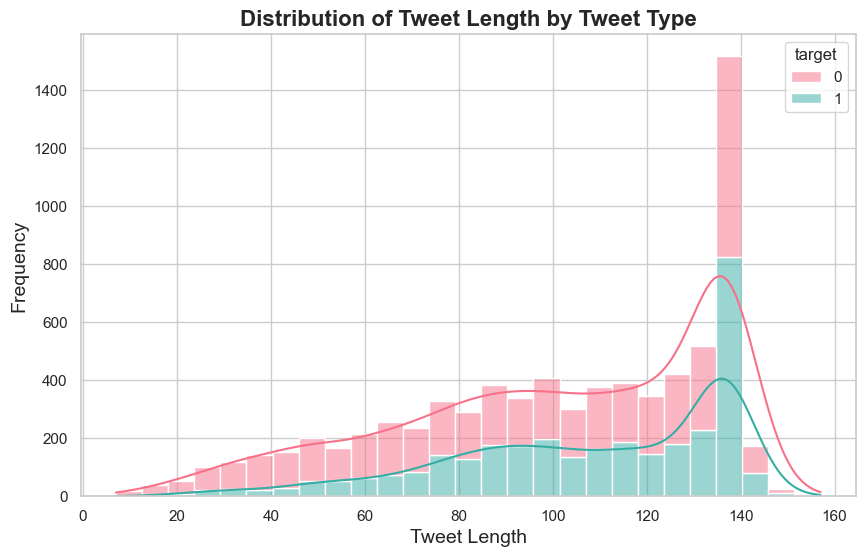

In [ ]:
# Copy the dataframe to avoid changing the original one
train_data_copy = train_data.copy()

# Calculate the length of each tweets
train_data_copy['Tweet_length'] = train_data_copy['text'].str.len()

# Set plot style
sns.set(style='whitegrid')

# Create a figure and plot the distribution of tweet lengths
plt.figure(figsize=(10, 6))

# Plot the distribution of tweet lengths for 0 and 1
sns.histplot(data=train_data_copy, x='Tweet_length', hue='target', multiple='stack', palette='husl', kde=True)

# Customize the title and label
plt.xlabel('Tweet Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Tweet Length by Tweet Type', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
#Train-test split
X = train_data['text']
y = train_data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform the training and testing data
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import PassiveAggressiveClassifier



# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()


}

In [ ]:
# Train each model and store the predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    predictions[name] = model.predict(X_val_tfidf)

In [ ]:
# Make predictions for each model
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_val_tfidf)

In [ ]:
# Evaluate each model by displaying f1 score
from sklearn.metrics import f1_score

# Collect accuracy scores and classification reports
results = {}
for name, y_pred in predictions.items():
    f1 = f1_score(y_val, y_pred)

    results[name] = {
        'f1_score': f1
    }


# Display results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"f1_score: {result['f1_score']:.4f}")
    print(' ')


Model: Logistic Regression
f1_score: 0.7230
 
Model: Naive Bayes
f1_score: 0.7339
 
Model: Random Forest
f1_score: 0.6887
 
Model: Support Vector Machine
f1_score: 0.7263
 
Model: Gradient Boosting
f1_score: 0.6486
 
Model: K-Nearest Neighbors
f1_score: 0.3629
 
Model: Decision Tree
f1_score: 0.6300
 
Model: Neural Network
f1_score: 0.6768
 
Model: Extra Trees Classifier
f1_score: 0.7252
 
Model: Passive Aggressive Classifier
f1_score: 0.6742
 


In [ ]:
#Train the best model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

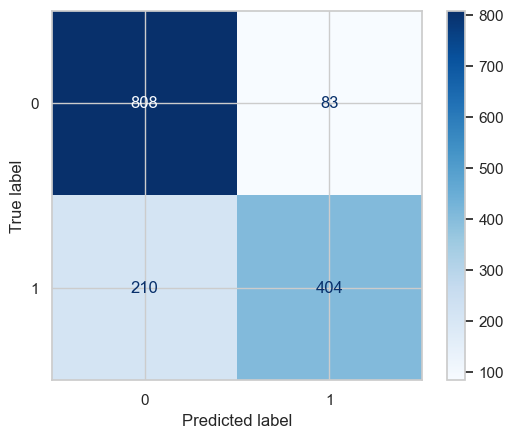

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Retrieve predictions for SVM
svm_model = models['Naive Bayes']  # Get the SVM model
y_pred_svm = predictions['Naive Bayes']  # Predictions for SVM

# Step 2: Generate the confusion matrix
conf_matrix_svm_tfidf = confusion_matrix(y_val, y_pred_svm)

# Step 3: Visualize the confusion matrix
disp_svm_tfidf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm_tfidf, display_labels=[0, 1])
disp_svm_tfidf.plot(cmap='Blues')
